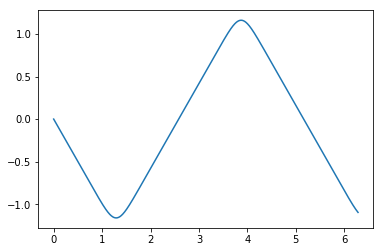

In [36]:
# Let's first try linear force  Fx=-x, then try Fx=, -x**3, -x**5, ..., -x**11

""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# rk4.py 4th order Runge Kutta
		 
import matplotlib.pylab as p
import numpy as np

#   Initialization
a = 0.
b = 6.2832
n = 1000                                         
ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 0.;   y[1] = -1.
t = a;       h = (b-a)/n;
xp=np.array([0.0])
yp=np.array([y[0]])

def f( t, y):                                           # Force function 
    fReturn[0] = y[1] # finish this line                                            
    fReturn[1] = -y[0]**11# finish this line      
    return fReturn

def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                            # Returns RHS's  
    for i in range(0, n):
        k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

while (t < b):                                              # Time loop
    if ((t + h) > b):
        h = b - t                                           # Last step
    y = rk4(t,h,2)
    t = t + h
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])
    
p.plot(xp,yp)
p.show()

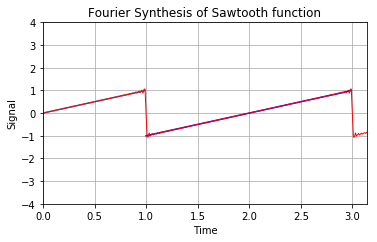

In [37]:
""" Author: Oscar Restrepo, From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python  
   eTextBook by RH Landau, MJ Paez, and CC Bordeianu. 
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

" FourierMatplot.py: Fourier synthesis  sawtooth + interactive slider"

import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from pylab import *

M = 4                                
T = 2.                                                    # Period 

numwaves =  70
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.25)         # L & B margins
t = np.arange(0.0, pi, 0.01)               
t1 = np.arange(0.0,T/2,0.01)               
t2 = t[100:300]                               
f1 = t1                                 
f2 = t2-T                                  
s = 0 
plot(t1,f1)                                 
plot(t2,f2,color='b')           

def Four(M,T,t):         # M = number waves, T = period, t = time
    sumy = 0                                            
    om = 2.*pi/T                                    # Omega = 2pi/T
    fac = 1
    for m in range(1,M):         
        fac =  (-1)**(m+1)/m      # Finish this line, and try different numwaves at the top
        sumy += fac* sin(m*om*t)                       
    sumy = (2.0/pi)*sumy                           # Common factor
    return sumy

s = Four(M,T,t)                                    # Initial plot   
l, = plt.plot(t,s, lw=1, color='red')
plt.axis([0, pi, -4.0, 4.0])             # minx, maxx, miny, maxy

xlabel('Time')                                        
ylabel('Signal')                                      
title('Fourier Synthesis of Sawtooth function')
grid(True)               


# Previous: value of the slider (float) assigned to snumwaves

def hzfunc():     
    hzdict = Four(int(numwaves),T,t)
    ydata = hzdict
    l.set_ydata(ydata)
    plt.draw()

hzfunc()

plt.show()

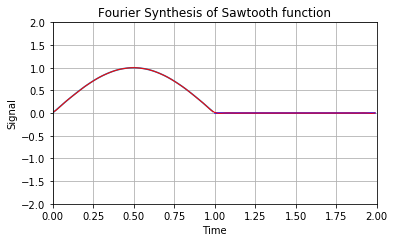

In [69]:
""" Author: Oscar Restrepo, From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python  
   eTextBook by RH Landau, MJ Paez, and CC Bordeianu. 
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

" FourierMatplot.py: Fourier synthesis  sawtooth + interactive slider"

import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from pylab import *

M = 4                                 
T = 2.                                                    # Period 

numwaves =  20
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.25)         # L & B margins
t = np.arange(0.0, T, 0.01)               
t1 = np.arange(0.0,T/2,0.01)               
t2 = t[100:300]  
om = 2.*pi/T 
f1 = sin(om*t1)                                 
f2 = t2*0.                                  
s = 0 
plot(t1,f1)                                 
plot(t2,f2,color='b')           

def Four(M,T,t):         # M = number waves, T = period, t = time
    om = 2.*pi/T 
    sumy = 1./2.*sin(om*t)+1./pi                                            
    for m in np.arange(2,M,2):         # M variable selected with slider
        fac = -2./pi/(m*m-1)
        sumy += fac* cos(m*om*t)                          
    return sumy

s = Four(M,T,t)                                    # Initial plot   
l, = plt.plot(t,s, lw=1, color='red')
plt.axis([0, T, -2.0, 2.0])             # minx, maxx, miny, maxy

xlabel('Time')                                        
ylabel('Signal')                                      
title('Fourier Synthesis of Sawtooth function')
grid(True)               


# Previous: value of the slider (float) assigned to snumwaves

def hzfunc():     
    hzdict = Four(int(numwaves),T,t)
    ydata = hzdict
    l.set_ydata(ydata)
    plt.draw()

hzfunc()

plt.show()

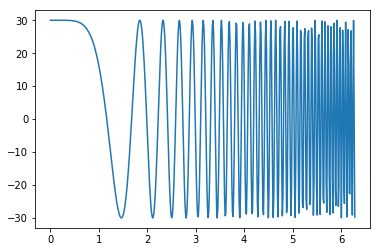

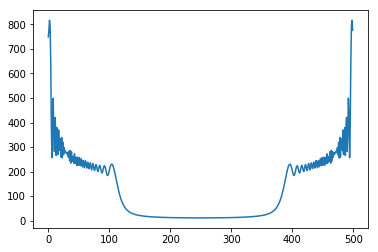

In [39]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# DFTcomplex.py:  Discrete Fourier Transform with built in complex
from numpy import *
import matplotlib.pyplot as plt
import cmath                                            # complex math
    
    
N = 500;                  Np = N                           
signal = zeros( (N+1), float )     
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/N
dftz   = zeros( (Np), complex )                  # Complex elements
xa = zeros( (N+1), float )   
nplot = zeros( N, float )   
fplot = zeros( N, float ) 

def f(signal):                                                  # Signal
    step = twopi/N;        
    x = 0. 
    for i in range(0, N+1):
        signal[i] = 30*cos(x*x*x)
        xa[i] = x                      # Plot
        x += step
        
      
def fourier(dftz):                                              # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += signal[k]*exp(-zexpo)        # finish this line
      dftz[n] = zsum * sq2pi      
      nplot[n] = n
      fplot[n] = sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)

f(signal);       
fourier(dftz)              # Call signal, transform
plt.plot(xa,signal)
plt.show()
plt.plot(nplot,fplot)
plt.show()

In [40]:
print(fplot)

[ 749.34818016  776.17093098  817.11362777  792.77631908  644.47760288
  387.13023059  256.44636884  435.27456495  499.03745146  353.96572901
  281.94705235  420.23162386  378.10645791  265.5830671   379.49531014
  344.99545214  270.05944759  369.86378571  285.97388611  307.91410089
  333.94600626  258.8219671   339.23392183  255.8446516   319.7145696
  269.00726311  298.04650055  277.15098161  283.61641497  277.02706659
  277.34995448  270.1377117   277.73579719  258.04303379  282.35811
  243.62592302  286.32020431  234.51456874  281.46226963  241.27255151
  261.19940281  261.79498247  234.38502117  272.39014467  232.69330771
  251.92087684  258.49161378  225.11033358  258.93842986  243.80412182
  225.81326124  257.26637337  236.51849202  224.01495004  252.642851
  236.13304129  218.85416093  244.96183529  240.96719764  215.75693767
  230.81352506  244.94126838  223.76085496  214.10639871  235.06932313
  238.31270415  216.7853422   212.20210251  231.06391087  235.59832156
  217.793483

Homework:¶
Highly nonlinear oscillator:

Recall the numerical solution for oscillations of a spring with power p = 12 (use F=-y[0]**11). Decompose the solution into a Fourier series and determine the number of higher harmonics that contribute at least 10%; for example, determine the n for which |bn /b1 | < 0.1. Check that resuming the components reproduces the signal. (Landau 289)

Warning: please only sample the data within one period

Landau, Rubin H., Manuel Páez, Cristian Bordeianu. Computational Physics: Problem Solving with Python, 3rd Edition. Wiley-Blackwell, 2015-07-15. VitalBook file.

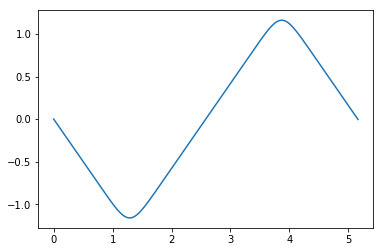

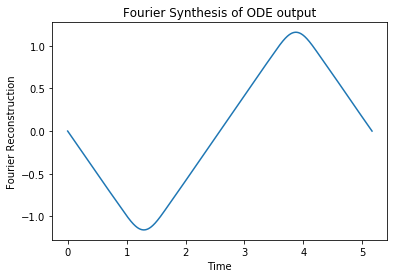

In [106]:
# Let's first try linear force  Fx=-x, then try Fx=, -x**3, -x**5, ..., -x**11

""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# rk4.py 4th order Runge Kutta
		 
import matplotlib.pylab as p
import numpy as np

#   Initialization
a = 0.
b = 5.165
n = 1000                                         
ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 0.;   y[1] = -1.
t = a;       h = (b-a)/n;
xp=np.array([0.0])
yp=np.array([y[0]])

def f( t, y):                                           # Force function 
    fReturn[0] = y[1] # finish this line                                            
    fReturn[1] = -y[0]**11# finish this line      
    return fReturn

def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                            # Returns RHS's  
    for i in range(0, n):
        k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

while (t < b):                                              # Time loop
    if ((t + h) > b):
        h = b - t                                           # Last step
    y = rk4(t,h,2)
    t = t + h
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])
    
p.plot(xp,yp)
p.show()
T0=b
om=2.*pi/T0
Nt=10
h=.005165
bc = np.zeros((Nt), float)
for k in range(0, Nt):
    bc[k]=0.
    for i in range(0, n+1):
        bc[k]+=yp[i]*sin(k*om*i*h)*h
    bc[k]=2.*bc[k]/T0
fyp = np.zeros((1002), float)
for k in range(0, Nt):
    if k < 1:
        fyp+=bc[k]/2.0
    else:
        fyp+=bc[k]*sin(k*om*xp)
p.plot(xp,fyp)
xlabel('Time')                                        
ylabel('Fourier Reconstruction')                                      
title('Fourier Synthesis of ODE output')
p.show()

In [100]:
abs

-197.98834204009606

In [98]:
bc[1]

-198.30338731347229

In [105]:
h

7.016609515630989e-14